In [7]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [8]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("C:/Users/brayan/Downloads/archivee/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([  8.,  27.,  90., 250., 485., 450., 185.,  74.,  19.,  11.]),
 array([0.99007 , 0.991432, 0.992794, 0.994156, 0.995518, 0.99688 ,
        0.998242, 0.999604, 1.000966, 1.002328, 1.00369 ]),
 <BarContainer object of 10 artists>)

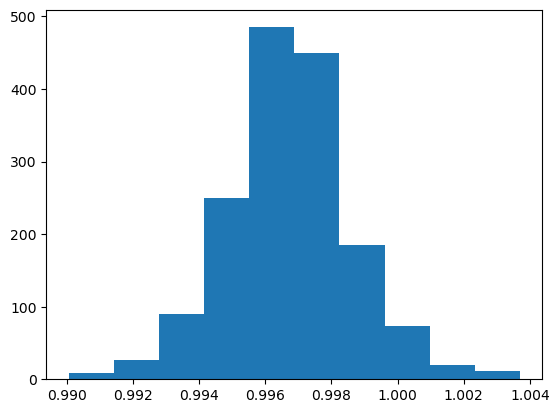

In [11]:
plt.hist(data.density)

<Axes: xlabel='density', ylabel='citric acid'>

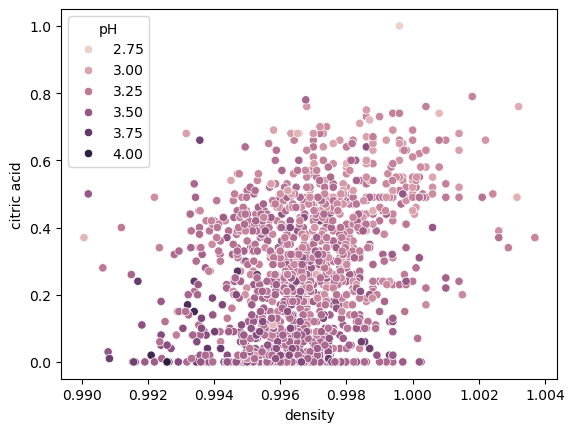

In [12]:
sns.scatterplot(x = "density", y = "citric acid", hue = "pH", data = data)

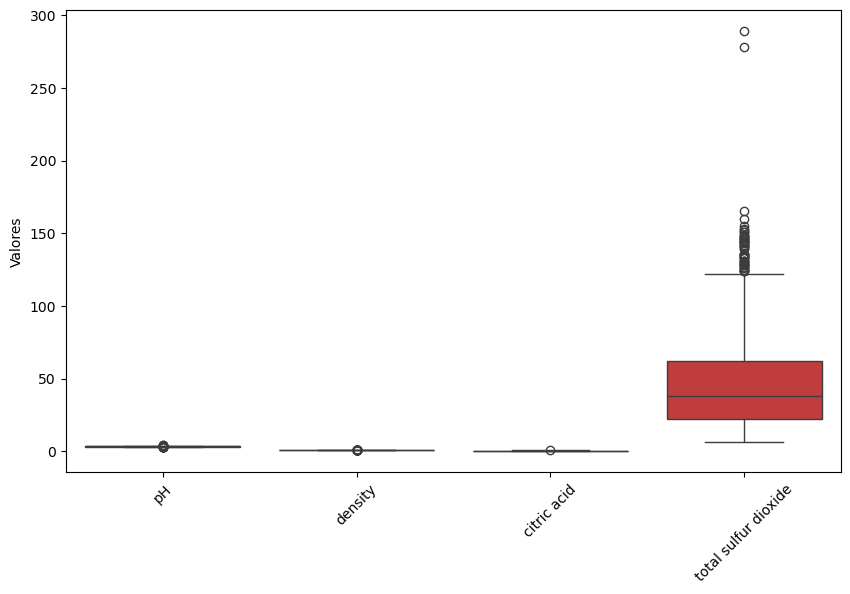

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['pH', 'density', 'citric acid', 'total sulfur dioxide']])
plt.xticks(rotation=45)
plt.title('')
plt.ylabel('Valores')
plt.show()

In [14]:
predictors_col = ["total sulfur dioxide", "pH", "density", "citric acid"]
target_col = ['citric acid']

In [17]:
predictors = data[predictors_col]
target = data[target_col]

In [21]:
predictors

,total sulfur dioxide,pH,density,citric acid
0,34.0,3.51,0.99780,0.00
1,67.0,3.20,0.99680,0.00
2,54.0,3.26,0.99700,0.04
3,60.0,3.16,0.99800,0.56
4,34.0,3.51,0.99780,0.00
...,...,...,...,...
1594,44.0,3.45,0.99490,0.08
1595,51.0,3.52,0.99512,0.10
1596,40.0,3.42,0.99574,0.13
1597,44.0,3.57,0.99547,0.12


In [27]:
target

,citric acid
0,0.00
1,0.00
2,0.04
3,0.56
4,0.00
...,...
1594,0.08
1595,0.10
1596,0.13
1597,0.12


In [29]:
corr = predictors.corr()
corr

,total sulfur dioxide,pH,density,citric acid
total sulfur dioxide,1.000000,-0.066495,0.071269,0.035533
pH,-0.066495,1.000000,-0.341699,-0.541904
density,0.071269,-0.341699,1.000000,0.364947
citric acid,0.035533,-0.541904,0.364947,1.000000


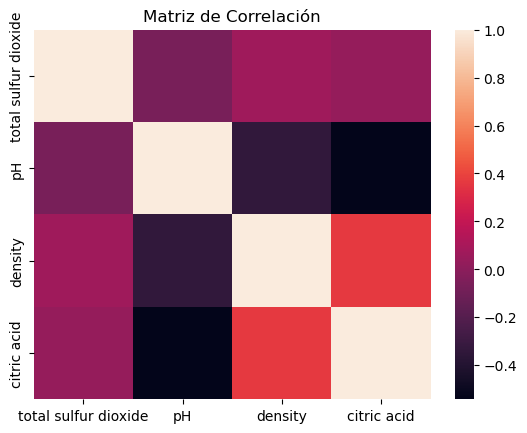

In [31]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [41]:
x = data.drop('citric acid', axis=1)
y = data['citric acid']

x = pd.get_dummies(x, drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.60 ,random_state=0)

In [43]:
print (x_train)

      fixed acidity  volatile acidity  residual sugar  chlorides  \
1500            7.5             0.725             1.5      0.076   
1429            7.9             0.180             2.2      0.049   
668            10.0             0.730             2.3      0.059   
1477            5.3             0.470             2.2      0.048   
788            10.0             0.560             2.2      0.079   
...             ...               ...             ...        ...   
763             9.3             0.655             2.0      0.096   
835             7.6             0.665             1.5      0.066   
1216            7.9             0.570             2.0      0.079   
559            13.0             0.470             4.3      0.085   
684             9.8             0.980             2.3      0.078   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1500                  8.0                  15.0  0.99508  3.26       0.53   
1429                 38.0    

In [45]:
print (x_test)

      fixed acidity  volatile acidity  residual sugar  chlorides  \
1109           10.8             0.470            2.10      0.171   
1032            8.1             0.820            4.10      0.095   
1002            9.1             0.290            2.05      0.063   
487            10.2             0.645            1.80      0.053   
979            12.2             0.450            1.40      0.075   
...             ...               ...             ...        ...   
1280            7.1             0.460            1.90      0.077   
1387            7.4             0.640            1.80      0.100   
1582            6.1             0.715            2.60      0.053   
920             9.6             0.410            2.30      0.091   
1030            7.1             0.590            2.10      0.091   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1109                 27.0                  66.0  0.99820  3.17       0.76   
1032                  5.0    

In [47]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit(x_train, y_train)

Prediccion= modelo_regresion.predict(x_test)

In [49]:
x_test.head(10)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5
1054,8.2,0.640,2.00,0.095,5.0,77.0,0.99747,3.13,0.62,9.1,6
542,9.3,0.715,2.10,0.070,5.0,20.0,0.99660,3.12,0.59,9.9,5
853,9.3,0.360,1.50,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6
1189,8.8,0.955,1.80,0.075,5.0,19.0,0.99616,3.30,0.44,9.6,4
412,7.1,0.735,1.90,0.100,15.0,77.0,0.99660,3.27,0.64,9.3,5


In [51]:
print (classification_report(y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.22      0.82      0.35        90
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        22
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         5
          17       0.00    

C:\Users\brayan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\brayan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\brayan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\brayan\anaconda3\Lib\site-packages\s

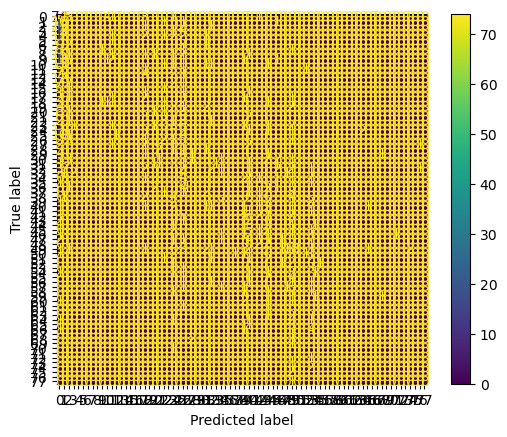

In [55]:
cm=confusion_matrix(y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()